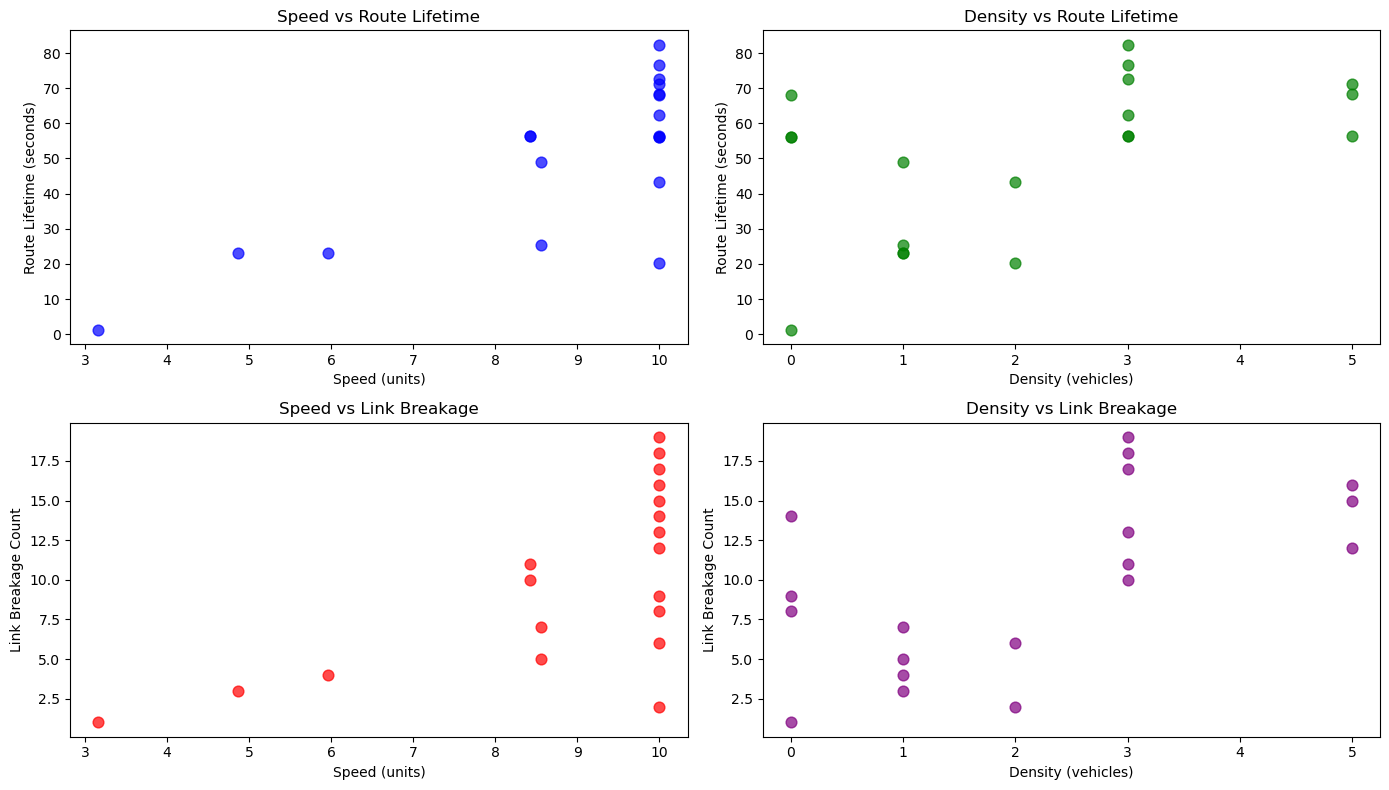

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
speed_file_path = 'speed.txt'
density_file_path = 'density.txt'
link_breakage_file_path = 'link_breakage.txt'
link_lifetime_file_path = 'link_lifetime.txt'

# Reading the files
speed_data = pd.read_csv(speed_file_path, header=None, names=['speed'])
density_data = pd.read_csv(density_file_path, header=None, names=['density'])

# Remove unnecessary text in the link_breakage.txt and extract only the numerical values
with open(link_breakage_file_path, 'r') as file:
    link_breakage_lines = file.readlines()

# Extract the numerical values from the lines
link_breakage_values = [int(line.split(':')[-1].strip()) for line in link_breakage_lines if "Link breakage occurred" in line]

# Create DataFrame for link_breakage values
link_breakage_data = pd.DataFrame(link_breakage_values, columns=['link_breakage'])

# Load link_lifetime data
with open(link_lifetime_file_path, 'r') as file:
    link_lifetime_lines = file.readlines()

# Extract the numerical values from the lines
link_lifetime_values = [float(line.split(':')[-1].strip().split()[0]) for line in link_lifetime_lines if "Route lifetime" in line]

# Create DataFrame for link_lifetime values
link_lifetime_data = pd.DataFrame(link_lifetime_values, columns=['lifetime'])

# Ensure all datasets have the same length (truncate to the shortest length)
min_length = min(len(speed_data), len(density_data), len(link_breakage_data), len(link_lifetime_data))
speed_data = speed_data[:min_length]
density_data = density_data[:min_length]
link_breakage_data = link_breakage_data[:min_length]
link_lifetime_data = link_lifetime_data[:min_length]

# Combine into one DataFrame
combined_data = pd.concat([speed_data, density_data, link_breakage_data, link_lifetime_data], axis=1)

# Plotting the relationships
plt.figure(figsize=(14, 8))

# Plot speed vs lifetime
plt.subplot(2, 2, 1)
plt.scatter(combined_data['speed'], combined_data['lifetime'], alpha=0.7, c='b', s=60)
plt.title('Speed vs Route Lifetime')
plt.xlabel('Speed (units)')
plt.ylabel('Route Lifetime (seconds)')

# Plot density vs lifetime
plt.subplot(2, 2, 2)
plt.scatter(combined_data['density'], combined_data['lifetime'], alpha=0.7, c='g', s=60)
plt.title('Density vs Route Lifetime')
plt.xlabel('Density (vehicles)')
plt.ylabel('Route Lifetime (seconds)')

# Plot speed vs link breakage
plt.subplot(2, 2, 3)
plt.scatter(combined_data['speed'], combined_data['link_breakage'], alpha=0.7, c='r', s=60)
plt.title('Speed vs Link Breakage')
plt.xlabel('Speed (units)')
plt.ylabel('Link Breakage Count')

# Plot density vs link breakage
plt.subplot(2, 2, 4)
plt.scatter(combined_data['density'], combined_data['link_breakage'], alpha=0.7, c='purple', s=60)
plt.title('Density vs Link Breakage')
plt.xlabel('Density (vehicles)')
plt.ylabel('Link Breakage Count')

plt.tight_layout()
plt.show()


In [9]:
# 상관계수 계산 및 출력
correlations = combined_data.corr(method='pearson')  # 피어슨 상관계수
print("피어슨 상관계수:\n", correlations)

spearman_correlations = combined_data.corr(method='spearman')  # 스피어만 상관계수
print("\n스피어만 상관계수:\n", spearman_correlations)


피어슨 상관계수:
                   speed   density  link_breakage  lifetime
speed          1.000000  0.420856       0.645493  0.759762
density        0.420856  1.000000       0.601046  0.519120
link_breakage  0.645493  0.601046       1.000000  0.954598
lifetime       0.759762  0.519120       0.954598  1.000000

스피어만 상관계수:
                   speed   density  link_breakage  lifetime
speed          1.000000  0.326818       0.614894  0.614894
density        0.326818  1.000000       0.615540  0.615540
link_breakage  0.614894  0.615540       1.000000  1.000000
lifetime       0.614894  0.615540       1.000000  1.000000
